(optim:tutorial:bridge)=
# Optimizing a bridge structure 


## Installation of the *truss* package

For this session, you will need the Python [truss](https://github.com/lcharleux/truss) package. The following cell will install it automatically.

In [264]:
# FOR JUPYTER LAB
%matplotlib widget
# FOR JUPYTER NOTEBOOK AND HUB
# % matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import zipfile
import urllib.request
import shutil
from scipy import optimize


In [265]:


url = "https://github.com/lcharleux/truss/archive/master.zip"
file_name = "truss-master.zip"

with urllib.request.urlopen(url) as response, open(file_name, "wb") as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

os.remove(file_name)

sys.path.append("truss-master")
try:
    import truss

    print("Truss is correctly installed")
except:
    print("Truss is NOT correctly installed !")

Truss is correctly installed


A short truss tutorial is available here:

http://truss.readthedocs.io/en/latest/tutorial.html

## Building the bridge structure

In this session, we will modelled a bridge structure using truss and optimize it using various criteria. The basic structure is introduced below. It is made of steel bars and loaded with one vertical force on $G$. The bridge is symmetrical so only the left half is modelled.

Text(0, 0.5, 'Axe $y$')

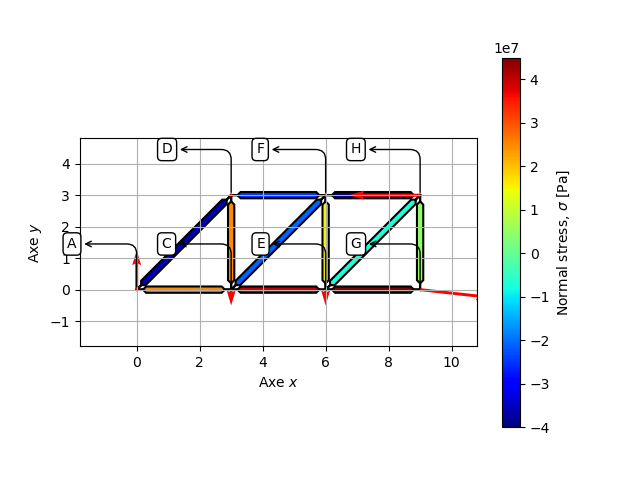

In [266]:
E = 210.0e9  # Young Modulus [Pa]
rho = 7800.0  # Density       [kg/m**3]
A = 5.0e-2  # Cross section [m**2]
sigmay = 400.0e6  # Yield Stress  [Pa]

# Model definition
model = truss.core.Model()  # Model definition

# NODES
nA = model.add_node((0.0, 0.0), label="A")
nC = model.add_node((3.0, 0.0), label="C")
nD = model.add_node((3.0, 3.0), label="D")
nE = model.add_node((6.0, 0.0), label="E")
nF = model.add_node((6.0, 3.0), label="F")
nG = model.add_node((9.0, 0.0), label="G")
nH = model.add_node((9.0, 3.0), label="H")

# BOUNDARY CONDITIONS
nA.block[1] = True
nG.block[0] = True
nH.block[0] = True


# BARS
AC = model.add_bar(nA, nC, modulus=E, density=rho, section=A, yield_stress=sigmay)
CD = model.add_bar(nC, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
AD = model.add_bar(nA, nD, modulus=E, density=rho, section=A, yield_stress=sigmay)
CE = model.add_bar(nC, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
DF = model.add_bar(nD, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
#DE = model.add_bar(nD, nE, modulus=E, density=rho, section=A, yield_stress=sigmay)
EF = model.add_bar(nE, nF, modulus=E, density=rho, section=A, yield_stress=sigmay)
EG = model.add_bar(nE, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
FH = model.add_bar(nF, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)
#FG = model.add_bar(nF, nG, modulus=E, density=rho, section=A, yield_stress=sigmay)
GH = model.add_bar(nG, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)

FC = model.add_bar(nF, nC, modulus=E, density=rho, section=A, yield_stress=sigmay)
EH = model.add_bar(nE, nH, modulus=E, density=rho, section=A, yield_stress=sigmay)


# STRUCTURAL LOADING
TotalLoad = -2.0e6

nG.force = np.array([0.0, TotalLoad/4/2.])
nE.force = np.array([0.0, TotalLoad/4.])
nC.force = np.array([0.0, TotalLoad/4.])
nA.force = np.array([0.0, TotalLoad/4/2.])



model.solve()


xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True, displacement_scale=100
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

### Read Data

#### Detailed results at the nodes

In [267]:
model.data(at="nodes")

label coords           disp                force             block       
      o      x    y        ux        uy         Fx         Fy     bx     by
0     A    0.0  0.0 -0.001571       0.0        0.0  1250000.0  False   True
1     C    3.0  0.0 -0.001214 -0.003867        0.0  -500000.0  False  False
2     D    3.0  3.0  0.000929  -0.00351        0.0        0.0  False  False
3     E    6.0  0.0 -0.000643 -0.006473        0.0  -500000.0  False  False
4     F    6.0  3.0  0.000571 -0.006259        0.0        0.0  False  False
5     G    9.0  0.0       0.0  -0.00739  2250000.0  -250000.0   True  False
6     H    9.0  3.0       0.0 -0.007318 -2250000.0        0.0   True  False

#### Detailed results on the bars

In [268]:
model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C    0.05  7800.0       1250000.0   0.000357  0.000119   
1     C  D    0.05  7800.0       1250000.0   0.000357  0.000119   
2     A  D    0.05  7800.0 -1767766.952966  -0.000714 -0.000168   
3     C  E    0.05  7800.0       2000000.0   0.000571   0.00019   
4     D  F    0.05  7800.0      -1250000.0  -0.000357 -0.000119   
5     E  F    0.05  7800.0        750000.0   0.000214  0.000071   
6     E  G    0.05  7800.0       2250000.0   0.000643  0.000214   
7     F  H    0.05  7800.0      -2000000.0  -0.000571  -0.00019   
8     G  H    0.05  7800.0        250000.0   0.000071  0.000024   
9     F  C    0.05  7800.0  -1060660.17178  -0.000429 -0.000101   
10    E  H    0.05  7800.0  -353553.390593  -0.000143 -0.000034   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0        25000000.0   False      0.15       3.0       1170.0       1.0   
1        25000000.0   False      0.15       3.0       1170.0       0.0   
2  -35355339.059328   False  0.212132  4.242641  1654.629868  0.707107   
3        40000000.0   False      0.15       3.0       1170.0       1.0   
4       -25000000.0   False      0.15       3.0       1170.0       1.0   
5        15000000.0   False      0.15       3.0       1170.0       0.0   
6   45000000.000001   False      0.15       3.0       1170.0       1.0   
7       -40000000.0   False      0.15       3.0       1170.0       1.0   
8         5000000.0   False      0.15       3.0       1170.0       0.0   
9  -21213203.435597   False  0.212132  4.242641  1654.629868 -0.707107   
10  -7071067.811866   False  0.212132  4.242641  1654.629868  0.707107   

              
          dy  
0        0.0  
1        1.0  
2   0.707107  
3        0.0  
4        0.0  
5        1.0  
6        0.0  
7        0.0  
8        1.0  
9  -0.707107  
10  0.707107

In [269]:
for bar in model.bars:
    mass = bar.mass()
    bar.conn[0].force[1] += -mass*9.81/2
    bar.conn[1].force[1] += -mass*9.81/2

Text(0, 0.5, 'Axe $y$')

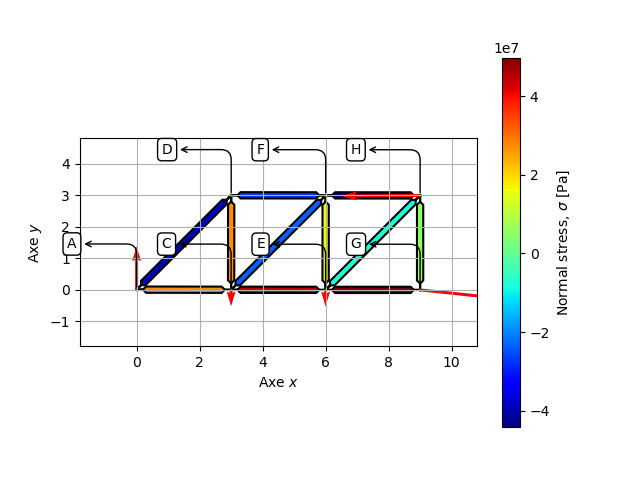

In [270]:
model.solve()


xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=True, field="stress", label=True, force_scale=1.0e-6, forces=True, displacement_scale=1000000, displacements=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

#### Dead (or structural) mass


In [271]:
m0 = model.mass()
m0 * 1.0e-3  # Mass in tons !

14.323889603929565

 ### Model modification
 #### Modifing section

In [272]:
# change section of one bar
FG.section = 0.0333

# solve with updated sections
model.solve()

model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C    0.05  7800.0  1376662.547512   0.000393  0.000131   
1     C  D    0.05  7800.0   1357068.88801   0.000388  0.000129   
2     A  D    0.05  7800.0 -1946894.845503  -0.000787 -0.000185   
3     C  E    0.05  7800.0  2208398.926019   0.000631   0.00021   
4     D  F    0.05  7800.0 -1376662.547512  -0.000393 -0.000131   
5     E  F    0.05  7800.0   806403.869005    0.00023  0.000077   
6     E  G    0.05  7800.0  2489470.285522   0.000711  0.000237   
7     F  H    0.05  7800.0 -2208398.926019  -0.000631  -0.00021   
8     G  H    0.05  7800.0        261477.7   0.000075  0.000025   
9     F  C    0.05  7800.0 -1176252.866804  -0.000475 -0.000112   
10    E  H    0.05  7800.0  -397494.928603  -0.000161 -0.000038   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0   27533250.950243   False      0.15       3.0       1170.0       1.0   
1   27141377.760194   False      0.15       3.0       1170.0       0.0   
2  -38937896.910055   False  0.212132  4.242641  1654.629868  0.707107   
3   44167978.520388   False      0.15       3.0       1170.0       1.0   
4  -27533250.950243   False      0.15       3.0       1170.0       1.0   
5   16128077.380097   False      0.15       3.0       1170.0       0.0   
6   49789405.710437   False      0.15       3.0       1170.0       1.0   
7  -44167978.520388   False      0.15       3.0       1170.0       1.0   
8         5229554.0   False      0.15       3.0       1170.0       0.0   
9  -23525057.336082   False  0.212132  4.242641  1654.629868 -0.707107   
10   -7949898.57206   False  0.212132  4.242641  1654.629868  0.707107   

              
          dy  
0        0.0  
1        1.0  
2   0.707107  
3        0.0  
4        0.0  
5        1.0  
6        0.0  
7        0.0  
8        1.0  
9  -0.707107  
10  0.707107

#### Changing all section (or other parameters)

In [273]:
# loop over bars
for bar in model.bars:
    # get the normal force of the bar
    N = bar.tension

    # change the section
    bar.section = 0.2


# solve with updated parameters
model.solve()

## Questions

**Question 1**: Verify that the yield stress is not exceeded anywhere, do you think this structure has an optimimum weight ? You can use the *state/failure* data available on the whole model.

In [274]:
# Example:
model.data(at="bars").state.failure.values

# ...

array([False, False, False, False, False, False, False, False, False,
       False, False], dtype=object)

**Question 2**: Modify all the cross sections at the same time in order to minimize weight while keeping acceptable stress level.

**Question 3**: We want to modify the position along the $\vec y$ axis of the points $D$, $F$ and $H$ in order to minimize the vertical displacement of the node $G$ times the mass of the structure $\alpha$: 

$$
\alpha = |u_y(G)| m
$$

Where $u_y(G)$ is the displacement of the node $G$ along the $\vec y$ axis and $m$ the mass of the whole structure.

Do not further modify the sections determined in question 4. Comment the solution.

In [275]:

model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C     0.2  7800.0  1376662.547512   0.000098  0.000033   
1     C  D     0.2  7800.0   1357068.88801   0.000097  0.000032   
2     A  D     0.2  7800.0 -1946894.845503  -0.000197 -0.000046   
3     C  E     0.2  7800.0  2208398.926019   0.000158  0.000053   
4     D  F     0.2  7800.0 -1376662.547512  -0.000098 -0.000033   
5     E  F     0.2  7800.0   806403.869005   0.000058  0.000019   
6     E  G     0.2  7800.0  2489470.285522   0.000178  0.000059   
7     F  H     0.2  7800.0 -2208398.926019  -0.000158 -0.000053   
8     G  H     0.2  7800.0        261477.7   0.000019  0.000006   
9     F  C     0.2  7800.0 -1176252.866804  -0.000119 -0.000028   
10    E  H     0.2  7800.0  -397494.928603   -0.00004 -0.000009   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0    6883312.737561   False       0.6       3.0       4680.0       1.0   
1    6785344.440049   False       0.6       3.0       4680.0       0.0   
2   -9734474.227514   False  0.848528  4.242641  6618.519472  0.707107   
3   11041994.630097   False       0.6       3.0       4680.0       1.0   
4   -6883312.737561   False       0.6       3.0       4680.0       1.0   
5    4032019.345024   False       0.6       3.0       4680.0       0.0   
6   12447351.427609   False       0.6       3.0       4680.0       1.0   
7  -11041994.630097   False       0.6       3.0       4680.0       1.0   
8         1307388.5   False       0.6       3.0       4680.0       0.0   
9    -5881264.33402   False  0.848528  4.242641  6618.519472 -0.707107   
10  -1987474.643015   False  0.848528  4.242641  6618.519472  0.707107   

              
          dy  
0        0.0  
1        1.0  
2   0.707107  
3        0.0  
4        0.0  
5        1.0  
6        0.0  
7        0.0  
8        1.0  
9  -0.707107  
10  0.707107

In [276]:
S_min = 1e-8
def cost(X):
    nD.coords[1]  = X[0]
    nF.coords[1]  = X[1]
    nH.coords[1]  = X[2]
    nD.coords[0]  = X[3]
    nF.coords[0]  = X[4]

 
    model.solve()
    # section ajustement
    for bar in model.bars:
        coef = np.abs( bar.stress/sigmay)
        new_section = bar.section * coef
        if new_section < S_min:
            new_section = S_min
        bar.section = new_section 

    model.solve()
    m = model.mass()
    
    # Cs = np.abs(model.data(at='bars').state.stress) / sigmay
    # Cs = Cs.values.astype(np.float64)
    # faillure = np.exp((Cs-1)*1000)
    # faillure = np.sum(faillure) + 1
    # print(faillure)
    
    return m * np.abs(nG.displacement[1]) 

import scipy
x0 = np.array([ 3.0, 3.0, 3.0, 3, 6])
sol = scipy.optimize.minimize(cost, x0)
sol
model.data(at="bars")

conn        props                   state                       \
     c1 c2   section density         tension elongation    strain   
0     A  C  0.001546  7800.0   618481.630734   0.005714  0.001905   
1     C  D    0.0017  7800.0   680022.304184   0.005819  0.001905   
2     A  D  0.003773  7800.0 -1509211.481959  -0.004928 -0.001905   
3     C  E  0.002626  7800.0  1050294.723583   0.005714  0.001905   
4     D  F  0.003349  7800.0 -1339747.761105  -0.008845 -0.001905   
5     E  F  0.001794  7800.0   717778.010285   0.010288  0.001905   
6     E  G  0.003286  7800.0  1314332.370967   0.005714  0.001905   
7     F  H   0.00307  7800.0 -1227905.509902  -0.008223 -0.001905   
8     G  H  0.000654  7800.0        261477.7   0.010721  0.001905   
9     F  C       0.0  7800.0         8.81166   0.010498  0.001905   
10    E  H  0.000485  7800.0  -194182.353104  -0.012148 -0.001905   

                              geometry                 props direction  \
              stress failure    volume    length        mass        dx   
0   399999999.999999   False  0.004639       3.0   36.181175       1.0   
1        400000000.0   False  0.005193  3.054798   40.507954 -0.635002   
2       -400000000.0   False  0.009761  2.587077   76.136699  0.409804   
3        400000000.0   False  0.007877       3.0   61.442241       1.0   
4       -400000000.0   False  0.015553  4.643447  121.310421  0.783952   
5   399999999.999999   False  0.009692  5.401287   75.600032 -0.240603   
6        400000000.0   False  0.009857       3.0   76.888444       1.0   
7  -399999999.999999   False  0.013252  4.316832  103.362912     0.996   
8        400000000.0    True  0.003679  5.628319   28.697758       0.0   
9   400000000.017795    True       0.0  5.511488    0.000947 -0.308525   
10 -400000000.000001    True  0.003096  6.377929   24.150383  0.470372   

              
          dy  
0        0.0  
1    0.77251  
2   0.912173  
3        0.0  
4   0.620822  
5   0.970624  
6        0.0  
7   0.089349  
8        1.0  
9  -0.951216  
10  0.882468

In [282]:
S_min = 1e-2
def cost(X):
    nD.coords[1]  = X[0]
    nF.coords[1]  = X[1]
    nH.coords[1]  = X[2]    
    nF.coords[0]  = X[3]

 
    model.solve()
    # section ajustement
    for bar in model.bars:
        coef = np.abs( bar.stress/sigmay)
        new_section = bar.section * coef
        if new_section < S_min:
            new_section = S_min
        bar.section = new_section 

    model.solve()
    m = model.mass()
    
    # Cs = np.abs(model.data(at='bars').state.stress) / sigmay
    # Cs = Cs.values.astype(np.float64)
    # faillure = np.exp((Cs-1)*1000)
    # faillure = np.sum(faillure) + 1
    # print(faillure)
    
    return m * np.abs(nG.displacement[1]) 

import scipy
nD.coords[0] = 0.0
nD.block[0] = True
x0 = np.array([ 5.0, 1.0, 1.0,5.])
sol = scipy.optimize.minimize(cost, x0)
sol
model.data(at="bars")

conn      props                   state                       \
     c1 c2 section density         tension elongation    strain   
0     A  C    0.01  7800.0             0.0        0.0       0.0   
1     C  D    0.01  7800.0   827224.079561    0.00236  0.000394   
2     A  D    0.01  7800.0 -1376662.547512    -0.0034 -0.000656   
3     C  E    0.01  7800.0   580326.451471   0.000829  0.000276   
4     D  F    0.01  7800.0   958672.701654   0.002588  0.000457   
5     E  F    0.01  7800.0  1021307.191071   0.001102  0.000486   
6     E  G    0.01  7800.0   1451310.01454   0.002073  0.000691   
7     F  H    0.01  7800.0  -312682.822253  -0.000864 -0.000149   
8     G  H    0.01  7800.0        261477.7   0.000583  0.000125   
9     F  C    0.01  7800.0  -252950.881619  -0.000223  -0.00012   
10    E  H    0.01  7800.0  -123452.572654  -0.000327 -0.000059   

                              geometry                 props direction  \
              stress failure    volume    length        mass        dx   
0                0.0   False      0.03       3.0       234.0       1.0   
1    82722407.956072   False  0.059918   5.99175  467.356506 -0.500688   
2  -137666254.751212   False  0.051866  5.186624  404.556675       0.0   
3    58032645.147143   False      0.03       3.0       234.0       1.0   
4    95867270.165372   False  0.056695  5.669543   442.22434  0.743592   
5   102130719.107071   False  0.022653  2.265274  176.691404 -0.787619   
6   145131001.453976   False      0.03       3.0       234.0       1.0   
7   -31268282.225258   False  0.058053  5.805264  452.810568   0.82411   
8         26147770.0   False  0.046841  4.684054  365.356178       0.0   
9   -25295088.161927   False  0.018511   1.85106  144.382716 -0.656827   
10  -12345257.265352   False  0.055624  5.562406  433.867649  0.539335   

              
          dy  
0        0.0  
1   0.865628  
2        1.0  
3        0.0  
4  -0.668634  
5   0.616162  
6        0.0  
7    0.56643  
8        1.0  
9  -0.754041  
10  0.842091

Text(0, 0.5, 'Axe $y$')

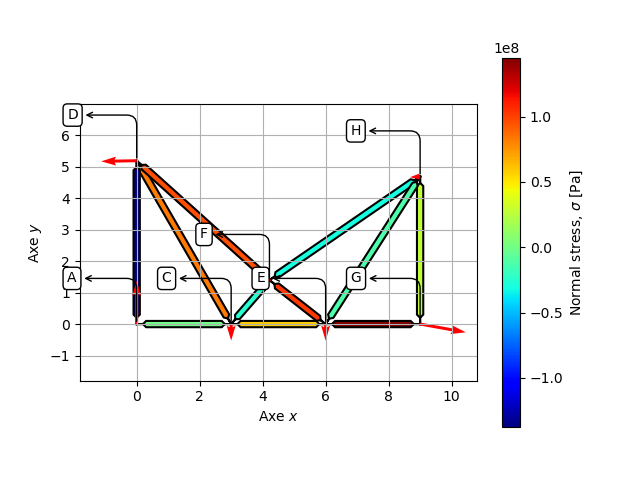

In [283]:
model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [293]:
fix_points = np.array([[0., 0], [9., 0.], [9., 3.], [9., 6.]])
ex_points = np.atleast_2d(np.arange(1,9.,3))
ex_points = np.append(ex_points, np.zeros_like(ex_points),  axis=0).T

fix_points = np.append( fix_points, ex_points, axis=0)
fix_points
nb_fix = len(fix_points)
nb_fix

7

In [364]:
np.random.uniform((1,1), (8,6), (nb_fix, 2))

array([[3.77050573, 2.67787623],
       [2.17926083, 3.94447292],
       [1.88069357, 4.45342859],
       [7.53951052, 5.39740586],
       [1.7821885 , 3.97033117],
       [4.69445305, 4.11213409],
       [7.92185874, 4.77569316]])

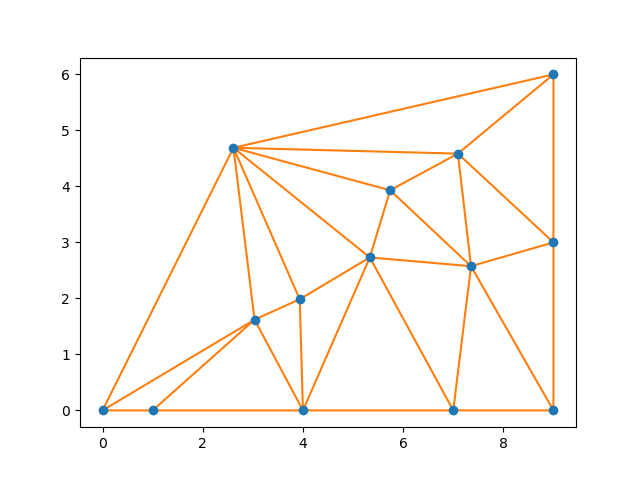

In [365]:
import matplotlib
Nb_inerpoints = 20
points = np.append(fix_points, np.random.uniform((1,1), (8,6), (nb_fix, 2)), axis=0)
tri = matplotlib.tri.Triangulation(points[:,0], points[:,1])
plt.figure()
plt.plot(points[:,0], points[:,1], 'o')
plt.triplot(tri)
plt.show()

In [366]:
E = 210.0e9  # Young Modulus [Pa]
rho = 7800.0  # Density       [kg/m**3]
A = .7e-2  # Cross section [m**2]
sigmay = 400.0e6  # Yield Stress  [Pa]

# Model definition
model = truss.core.Model()  # Model definition

# NODES
nodes = []
#nA = model.add_node((0.0, 0.0), label="A")
#nodes.append(nA)
#nG = model.add_node((9.0, 0.0), label="G")
#nodes.append(nG)

for i, p in enumerate(points):
    nodes.append(model.add_node((p[0], p[1]), label="n{:03d}".format(i)))


for i, e in enumerate(tri.edges):
    model.add_bar(nodes[e[0]], nodes[e[1]], modulus=E, density=rho, section=A, yield_stress=sigmay)
    
# BOUNDARY CONDITIONS
nodes[0].block[1] = True
nodes[1].block[0] = True
nodes[2].block[0] = True
nodes[3].block[0] = True

# STRUCTURAL LOADING
for i in range(nb_fix):
    nodes[i].force = np.array([0.0, -1.0e6])/2.

Text(0, 0.5, 'Axe $y$')

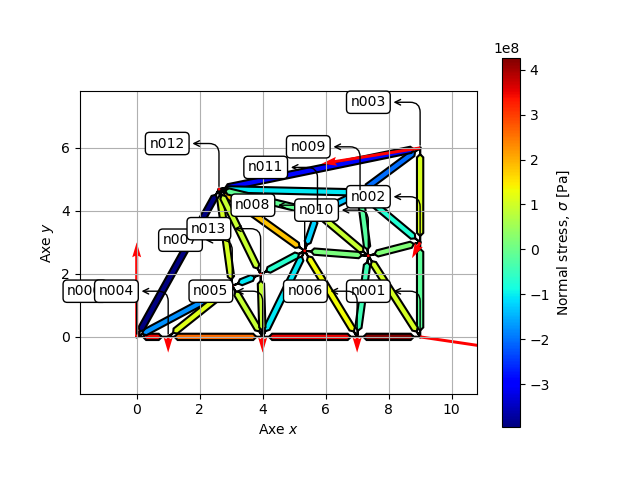

In [368]:
model.solve()
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=True, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [369]:
S_min = 0.2
def cost(X):
    for i,id_nodes in enumerate(range(nb_fix,len(nodes))):
        nodes[id_nodes].coords[0] = X[i]
        nodes[id_nodes].coords[1] = X[Nb_inerpoints+i]
            
    model.solve()
    # section ajustement
    for bar in model.bars:
        coef = np.abs( bar.stress/sigmay)
        new_section = bar.section * coef
        if new_section < S_min:
            new_section = S_min
        bar.section = new_section 

    model.solve()
    m = model.mass()
    u_n001 = nodes[1].displacement[1]   

    return np.abs(u_n001)*m

x0 = np.zeros(2*Nb_inerpoints)
for i,id_nodes in enumerate(range(nb_fix,len(nodes))):
        x0[i] = nodes[id_nodes].coords[0] 
        x0[Nb_inerpoints+i] = nodes[id_nodes].coords[1]
print(x0)
cost(x0)

[3.03432345 5.33453408 7.09277802 7.35468322 5.7404693  2.61316389
 3.93569183 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.62018386 2.73126019 4.58523751 2.57478543
 3.93090686 4.68994099 1.98526621 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


194.52550722067315

In [ ]:
import scipy
x0 = sol.x
sol = scipy.optimize.minimize(cost, x0, method='Nelder-Mead')
sol

 final_simplex: (array([[0.04956336, 3.34199724, 4.4005405 , ..., 6.4417869 , 8.90107638,
        1.50357903],
       [0.04956745, 3.34199865, 4.4005405 , ..., 6.44178451, 8.90107182,
        1.50357894],
       [0.04955984, 3.34199592, 4.4005405 , ..., 6.44178921, 8.90108017,
        1.5035794 ],
       ...,
       [0.04956497, 3.34199772, 4.40054049, ..., 6.44178613, 8.90107435,
        1.50357931],
       [0.04955511, 3.34199401, 4.40054048, ..., 6.44179275, 8.90108412,
        1.50358094],
       [0.04955093, 3.34199257, 4.40054048, ..., 6.44179505, 8.90108912,
        1.50358075]]), array([162.75216527, 162.75216586, 162.75217362, 162.75217466,
       162.75217692, 162.75217706, 162.75217731, 162.75217923,
       162.75218011, 162.75218271, 162.75218322, 162.75218336,
       162.7521838 , 162.75218451, 162.75218482, 162.75218489,
       162.75218718, 162.75218756, 162.75218807, 162.75218817,
       162.75218828, 162.752189  , 162.75218962, 162.75218983,
       162.75219092, 162.75

: 

Text(0, 0.5, 'Axe $y$')

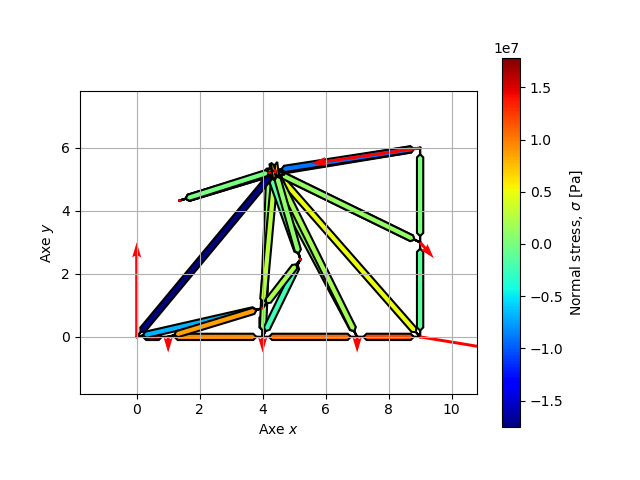

In [372]:
xlim, ylim = model.bbox(deformed=False)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect("equal")
# ax.axis("off")
model.draw(
    ax, deformed=False, field="stress", label=False, force_scale=1.0e-6, forces=True
)
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid()
plt.xlabel("Axe $x$")
plt.ylabel("Axe $y$")

In [348]:
model.data(at="bars")

conn         props                   state                       \
      c1    c2 section density         tension elongation    strain   
0   n002  n001     0.2  7800.0  -202777.832959  -0.000014 -0.000005   
1   n003  n002     0.2  7800.0  -196022.736335  -0.000014 -0.000005   
2   n004  n000     0.2  7800.0  1316148.537201   0.000031  0.000031   
3   n005  n004     0.2  7800.0  1300154.671608   0.000093  0.000031   
4   n006  n001     0.2  7800.0  2320273.325305    0.00011  0.000055   
5   n006  n005     0.2  7800.0  1530905.225659   0.000109  0.000036   
6   n007  n006     0.2  7800.0   325887.483111   0.000028  0.000008   
7   n008  n000     0.2  7800.0 -2058562.794836  -0.000157 -0.000049   
8   n008  n004     0.2  7800.0   500255.738335   0.000036  0.000012   
9   n008  n005     0.2  7800.0   373200.354373   0.000037  0.000009   
10  n009  n002     0.2  7800.0   342133.361145   0.000034  0.000008   
11  n009  n003     0.2  7800.0 -1623304.514944  -0.000129 -0.000039   
12  n009  n007     0.2  7800.0   -70848.700793  -0.000005 -0.000002   
13  n010  n001     0.2  7800.0  1177645.013953   0.000062  0.000028   
14  n010  n002     0.2  7800.0  -413615.046193  -0.000024  -0.00001   
15  n010  n006     0.2  7800.0  -160442.836499  -0.000005 -0.000004   
16  n010  n007     0.2  7800.0   543483.580128   0.000038  0.000013   
17  n010  n009     0.2  7800.0   590360.592056   0.000063  0.000014   
18  n011  n007     0.2  7800.0    878381.02416   0.000056  0.000021   
19  n011  n008     0.2  7800.0  -799551.166597  -0.000042 -0.000019   
20  n011  n009     0.2  7800.0 -1021845.030704  -0.000078 -0.000024   
21  n012  n003     0.2  7800.0 -1627951.671796  -0.000137 -0.000039   
22  n012  n009     0.2  7800.0   743236.866396   0.000006  0.000018   
23  n013  n009     0.2  7800.0  -649257.439574  -0.000012 -0.000015   
24  n013  n011     0.2  7800.0  -925057.648724  -0.000054 -0.000022   
25  n013  n012     0.2  7800.0 -1286386.287538  -0.000019 -0.000031   
26  n014  n000     0.2  7800.0 -1228972.895406  -0.000155 -0.000029   
27  n014  n008     0.2  7800.0  -766036.201625   -0.00004 -0.000018   
28  n014  n011     0.2  7800.0 -1281520.969749       -0.0 -0.000031   
29  n014  n013     0.2  7800.0  -971204.707336  -0.000057 -0.000023   
30  n015  n005     0.2  7800.0   232873.762297   0.000011  0.000006   
31  n015  n006     0.2  7800.0   688241.861215   0.000056  0.000016   
32  n015  n007     0.2  7800.0    -8575.299973       -0.0      -0.0   
33  n015  n008     0.2  7800.0   155625.251395   0.000012  0.000004   
34  n015  n011     0.2  7800.0   706808.787136   0.000051  0.000017   

                             geometry                  props direction  \
             stress failure    volume    length         mass        dx   
0   -1013889.164796   False       0.6       3.0       4680.0       0.0   
1    -980113.681675   False       0.6       3.0       4680.0       0.0   
2    6580742.686005   False       0.2       1.0       1560.0      -1.0   
3    6500773.358039   False       0.6       3.0       4680.0      -1.0   
4   11601366.626524   False       0.4       2.0       3120.0       1.0   
5    7654526.128295   False       0.6       3.0       4680.0      -1.0   
6    1629437.415556   False  0.731159  3.655793  5703.036793  0.639684   
7  -10292813.974178   False  0.641702  3.208509  5005.273674 -0.341733   
8    2501278.691673   False  0.603378  3.016889  4706.347111 -0.031971   
9    1866001.771864   False  0.837207  4.186036  6530.215835  0.693627   
10   1710666.805723   False  0.837502   4.18751  6532.515742  0.790577   
11  -8116522.574721   False   0.66782  3.339102  5208.998524  0.991449   
12   -354243.503967   False  0.587977  2.939884  4586.219515 -0.349675   
13   5888225.069767   False  0.443368  2.216838  3458.267357  0.802416   
14  -2068075.230963   False  0.488949  2.444745  3813.801866  0.727612   
15   -802214.182494   False  0.268259  1.341293  2092.417684 -0.164896   
16   2717417.900642   False  0.592065  2.960

**Question 4**: Same question with displacements also along $\vec x$ of $C$, $D$, $E$ and $F$. Is it better ?

**Question 5**:  You can now try to perform topological optimization by removing/merging well chosen beams and nodes. In order to make the structure even more efficient.

**Question 6**: You are now asked to optimize the cross section along with the position of $C$, $D$, $E$ and $F$ in order to reach the yield stress in each individual beam.